In [86]:
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import math

In [87]:
new_col=[1]*20
new_col2=[1]*100
idx=0
name=['x1','x2']
col='x0'
train1=pd.read_csv('traininput1.csv',names=name)
train1.insert(loc=idx,value=new_col,column=col)
train2=pd.read_csv('traininput2.csv',names=name)
train2.insert(loc=idx,value=new_col,column=col)
train3=pd.read_csv('traininput3.csv',names=name)
train3.insert(loc=idx,value=new_col,column=col)
train4=pd.read_csv('traininput4.csv',names=name)
train4.insert(loc=idx,value=new_col,column=col)
train5=pd.read_csv('traininput5.csv',names=name)
train5.insert(loc=idx,value=new_col,column=col)
train6=pd.read_csv('traininput6.csv',names=name)
train6.insert(loc=idx,value=new_col,column=col)
train7=pd.read_csv('traininput7.csv',names=name)
train7.insert(loc=idx,value=new_col,column=col)
train8=pd.read_csv('traininput8.csv',names=name)
train8.insert(loc=idx,value=new_col,column=col)
train9=pd.read_csv('traininput9.csv',names=name)
train9.insert(loc=idx,value=new_col,column=col)
train10=pd.read_csv('traininput10.csv',names=name)
train10.insert(loc=idx,value=new_col,column=col)
target1=pd.read_csv('trainTarget1.csv',header=None)
target2=pd.read_csv('trainTarget2.csv',header=None)
target3=pd.read_csv('trainTarget3.csv',header=None)
target4=pd.read_csv('trainTarget4.csv',header=None)
target5=pd.read_csv('trainTarget5.csv',header=None)
target6=pd.read_csv('trainTarget6.csv',header=None)
target7=pd.read_csv('trainTarget7.csv',header=None)
target8=pd.read_csv('trainTarget8.csv',header=None)
target9=pd.read_csv('trainTarget9.csv',header=None)
target10=pd.read_csv('trainTarget10.csv',header=None)
testinput=pd.read_csv('testinput.csv',names=name)
testinput.insert(loc=idx,value=new_col2,column=col)
testTarget=pd.read_csv('testTarget.csv',header=None)

In [88]:
train=[train1,train2,train3,train4,train5,train6,train7,train8,train9,train10]
targetset=[target1,target2,target3,target4,target5,target6,target7,target8,target9,target10]

In [89]:
def cal_beta(x,y,lambda_parameter):
    A=np.mat(np.transpose(x))*np.mat(x)+lambda_parameter*np.identity(3)
    beta=np.mat(np.linalg.inv(A))*np.mat(np.transpose(x))*np.mat(y)
    return beta

In [159]:
def regression(lambda_parameter):
    error=0
    for i in range(10):
        err=0
        valset=np.array(train[i])
        labels_val=np.array(targetset[i])

        trainset=train[:i]+train[i+1:]
        targets_train=targetset[:i]+targetset[i+1:]

        x=np.concatenate((trainset[0],trainset[1],trainset[2],trainset[3],trainset[4],trainset[5],trainset[6],trainset[7],trainset[8]),axis=0)
        y=np.concatenate((targets_train[0],targets_train[1],targets_train[2],targets_train[3],targets_train[4],targets_train[5],targets_train[6],targets_train[7],targets_train[8]),axis=0)

        beta=cal_beta(x,y,lambda_parameter)

        predict=valset*beta
        
        #get rid of for loop 
        
        err = np.sqrt(np.mat(np.transpose(predict-labels_val))*(np.mat(predict-labels_val)))
        
        error+=err
    avg=error/10
    return (avg,beta)

In [162]:
w=0
error_vec=[]
beta_vec=[]
while w<4:
    w+=0.1
    result=regression(w)
    error_vec.append(result[0])
    beta_vec.append(result[1])

In [155]:
y=[]
for i in range(len(error_vec)):
    y.append(float(error_vec[i]))

In [161]:
y.index(min(y))

13

In [163]:
min(y)

5.155746962582555

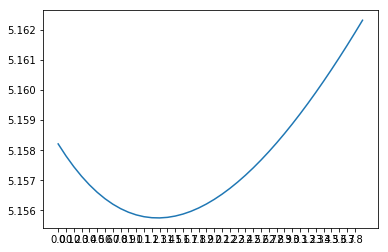

In [156]:
x=np.arange(0, 4, 0.1)
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x), 0.1))
plt.show()

In [168]:
train_tot=np.concatenate((train1,train2,train3,train4,train5,train6,train7,train8,train9,train10),axis=0)
label_tot=np.concatenate((target1,target2,target3,target4,target5,target6,target7,target8,target9,target10),axis=0).flatten()
test = np.array(testinput)
test_label = np.array(testTarget)

beta_f=beta_vec[13]
predict=test*beta_f
err = np.sqrt(np.mat(np.transpose(predict-test_label))*(np.mat(predict-test_label)))

In [169]:
err

matrix([[12.06606286]])